# Probabilistic Graphical Models in one notebook
> A quick and to the point walk through 


## Theoretical
[Wiki](https://en.wikipedia.org/wiki/Graphical_model#:~:text=A%20graphical%20model%20or%20probabilistic,Bayesian%20statistics%E2%80%94and%20machine%20learning.)

[Blog post](https://medium.com/@jonathan_hui/machine-learning-graphical-model-b68b0c27a749)

Bert Huang's videos are amazing 
 - [Undirected Graphical Models](https://www.youtube.com/watch?v=iBQkZdPHlCs)
 - [Probabilistic Graphical Models and Bayesian Networks](https://www.youtube.com/watch?v=zCWRTKnOYYg)


## Practical 
[Video - Probabilistic Graphical Models in Python](https://www.youtube.com/watch?v=DEHqIxX1Kq4), code starts @ 16:00 | [Github Repo](https://github.com/AileenNielsen/PyGotham_2016_Probabilistic_Graphical_Models)





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, roc_auc_score

from IPython.core.interactiveshell import InteractiveShell # multiline output, so `x` does `print(x)`
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[pomegranate Docs](https://pomegranate.readthedocs.io/en/latest/faq.html)

[pgmpy Docs](https://github.com/pgmpy/pgmpy#installation) | [Notebooks](https://github.com/pgmpy/pgmpy_notebook/tree/master/notebooks)


In [ ]:
# ! pip install pgmpy

In [ ]:
# sample code https://github.com/IBM/predict-fraud-using-auto-ai/blob/master/notebook/Fraud_Detect.ipynb
df = pd.read_csv("https://raw.githubusercontent.com/IBM/predict-fraud-using-auto-ai/master/data/fraud_dataset.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [ ]:
count_fraud = len(df[df['Fraud_Risk']==0])
count_non_fraud = len(df[df['Fraud_Risk']==1])
pct_of_non_fraud = count_non_fraud/(count_non_fraud +count_fraud)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term', 'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk']
percentage of non Fraud Risk is 57.68
percentage of Fraud Risk is 42.32


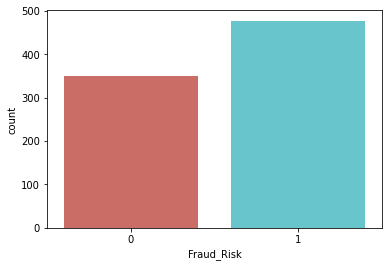

In [ ]:
print(list(df.columns))

print("percentage of non Fraud Risk is", round(pct_of_non_fraud*100,2))
print("percentage of Fraud Risk is", round((1-pct_of_non_fraud)*100,2))

sns.countplot(x='Fraud_Risk',data=df, palette='hls')
plt.show()

In [ ]:
df.groupby('Fraud_Risk').mean()

df.corr()['Fraud_Risk'] # Matrix to Series

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
Fraud_Risk,,,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.808571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000,2.005714
1,0.851153,0.834382,0.905660,0.777778,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545,1.958071


Gender                      0.309570
Married                     0.825064
Dependents                  0.315421
Education                  -0.037406
Self_Employed               0.688170
ApplicantIncome             0.066347
CoapplicantIncome           0.120304
LoanAmount                  0.164087
Loan_Term                  -0.097339
Credit_History_Available   -0.239512
Housing                    -0.082534
Locality                   -0.030530
Fraud_Risk                  1.000000
Name: Fraud_Risk, dtype: float64

In [ ]:
X = df[df.columns[0:12]]
y = df[df.columns[12:]]

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(metric='binary_logloss', objective='binary', n_estimators=5000,learning_rate=0.0001, min_child_weight=0.0005)
_ = model.fit(X_train, y_train)
print(model.score(X_test,y_test))
y_hat = model.predict(X_test)

model = LGBMClassifier(metric='binary_logloss', objective='binary', n_estimators=50,learning_rate=0.01, min_child_weight=0.9)
_ = model.fit(X_train, y_train)
print(model.score(X_test,y_test))
y_hat = model.predict(X_test)

0.9317269076305221
0.9317269076305221


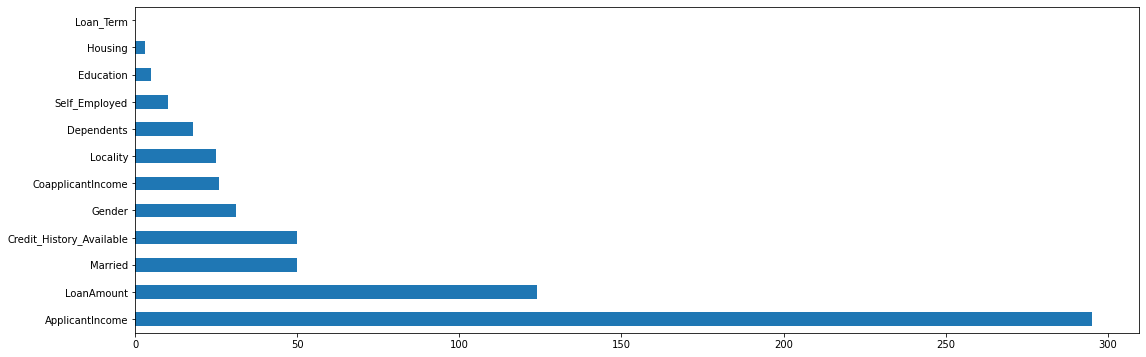

In [ ]:
struct = pd.Series(model.feature_importances_, index=X.columns).nlargest(len(X.columns))
struct.plot(kind='barh', figsize=(18, 6))

In [ ]:
# for the next part, 2**(n*(n-1)) graphs need to be searched. choose N to be <= 5. 6 if you have a new threadripper :) 
whitelist = np.argsort(model.feature_importances_)[-4:] # last N of the argsort, which is the index
whitelist

array([1, 9, 7, 5])

In [ ]:
print(list(df.columns))

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term', 'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk']


In [ ]:
df_top = df.iloc[:, whitelist]

In [ ]:
# from pgmpy.factors.discrete import TabularCPD
# from pgmpy.models import BayesianModel
# from pgmpy.estimators import ExhaustiveSearch, MaximumLikelihoodEstimator, BayesianEstimator

# bm = BayesianModel()
# # help(ExhaustiveSearch)

# s = ExhaustiveSearch(pd.DataFrame(df_top))
# all_edges = [dag.edges() for dag in s.all_dags()]
# all_edges[-1]

# # help(MaximumLikelihoodEstimator)

# bm = BayesianModel(all_edges[-1])
# MaximumLikelihoodEstimator(bm,df_top).estimate_cpd('ApplicantIncome')


# https://pgmpy.org/_modules/pgmpy/models/BayesianModel.html#BayesianModel
# https://github.com/pgmpy/pgmpy_notebook/blob/master/notebooks/9.%20Learning%20Bayesian%20Networks%20from%20Data.ipynb
# https://www.kaggle.com/surendrakarna/customer-fraud

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
# _ = model.fit(X_train, y_train)
# print(model.score(X_test,y_test))

```
class BayesClassifier(pomegranate.bayes.BayesModel)
 |  A Bayes classifier, a more general form of a naive Bayes classifier.
 |  
 |  A Bayes classifier, like a naive Bayes classifier, uses Bayes' rule in
 |  order to calculate the posterior probability of the classes, which are
 |  used for the predictions. However, a naive Bayes classifier assumes that
 |  each of the features are independent of each other and so can be modelled
 |  as independent distributions. A generalization of that, the Bayes
 |  classifier, allows for an arbitrary covariance between the features. This
 |  allows for more complicated components to be used, up to and including
 |  even HMMs to form a classifier over sequences, or mixtures to form a
 |  classifier with complex emissions.
```


        from_samples(...) from builtins.type 
                Create a Bayes classifier directly from the given dataset.

               This will initialize the distributions using maximum likelihood estimates
               derived by partitioning the dataset using the label vector. If any labels
               are missing, the model will be trained using EM in a semi-supervised
               setting.
       
               A homogeneous model can be defined by passing in a single distribution
               callable as the first parameter and specifying the number of components,
               while a heterogeneous model can be defined by passing in a list of
               callables of the appropriate type.
       
               A Bayes classifier is a superset of the naive Bayes classifier in that
               the math is identical, but the distributions used do not have to be
               independent for each feature. Simply put, one can create a multivariate
               Gaussian Bayes classifier with a full covariance matrix, but a Gaussian
               naive Bayes would require a diagonal covariance matrix.
       
               Parameters
               ----------
               distributions : array-like, shape (n_components,) or callable
                       The components of the model. This should either be a single callable
                       if all components will be the same distribution, or an array of
                       callables, one for each feature.
       
               X : array-like, shape (n_samples, n_dimensions)
                       This is the data to train on. Each row is a sample, and each column
                       is a dimension to train on.
       
               y : array-like, shape (n_samples,)
                       The labels for each sample. The labels should be integers between
                       0 and k-1 for a problem with k classes, or -1 if the label is not
                       known for that sample.
       
               

In [ ]:
!pip install pomegranate
from pomegranate import *

y = y.values.ravel()

In [ ]:
# docs - NaiveBayes: https://pomegranate.readthedocs.io/en/latest/NaiveBayes.html#pomegranate.NaiveBayes.NaiveBayes.from_samples
# docs - distributions: https://pomegranate.readthedocs.io/en/latest/Distributions.html
# help(NaiveBayes)
# help(BayesClassifier)

In [ ]:
model = NaiveBayes.from_samples(NormalDistribution, X, y)
pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(accuracy_score(y_test,pred)) # np.sum(pred == y_test)/ (len(y_test))
confusion_matrix(y_test,pred)

0.44176706827309237
0.44176706827309237


array([[110,   0],
       [139,   0]])

In [ ]:
model = BayesClassifier.from_samples(DirichletDistribution, X, y)
pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(accuracy_score(y_test,pred)) 

0.5060240963855421
0.5060240963855421


In [ ]:
model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)
pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(accuracy_score(y_test,pred)) 

0.9196787148594378
0.9196787148594378


In [ ]:
model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)
pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(accuracy_score(y_test,pred)) 

0.9196787148594378
0.9196787148594378


In [ ]:
# docs - HMM: https://pomegranate.readthedocs.io/en/latest/MarkovNetwork.html
# help(MarkovNetwork)
# model = MarkovNetwork.from_samples(X, y, n_jobs=-1)

In [ ]:
# pred = model.predict(X_test)
# print(model.score(X_test,y_test))
# print(accuracy_score(y_test,pred)) 

In [ ]:
# auc, roc_curve, roc_auc_score

In [ ]:
# model = BayesClassifier.from_samples(BayesianNetwork, X, y)

In [ ]:
# https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html
model = BayesianNetwork.from_samples(X, y, n_jobs=-1)